In [1]:
import tensorflow as tf
from tensorflow import keras
import datetime
import os
import random
import pandas as pd
import numpy as np
import pickle

/Users/a80099707/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/a80099707/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/a80099707/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/a80099707/anaconda3/lib/python3.6/site-packages/tensorflow/pyth

In [2]:
from keras import metrics

from tensorflow.keras.layers import Dense, Concatenate, Add, Multiply
from tensorflow.keras import Input, Model

Using TensorFlow backend.


In [69]:
raw = pd.read_csv('./data/20210420_trainXs_y1_y2.csv', header=None)

In [353]:
raw.groupby(by=49).count()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
49,,,,,,,,,,,,,,,,,,,,,
1.0,30881,30881,30881,30881,30881,30881,30881,30881,30881,30881,...,30881,30881,30881,30881,30881,30881,30881,30881,30881,30881
2.0,6267,6267,6267,6267,6267,6267,6267,6267,6267,6267,...,6267,6267,6267,6267,6267,6267,6267,6267,6267,6267
3.0,753,753,753,753,753,753,753,753,753,753,...,753,753,753,753,753,753,753,753,753,753
4.0,16639,16639,16639,16639,16639,16639,16639,16639,16639,16639,...,16639,16639,16639,16639,16639,16639,16639,16639,16639,16639
5.0,922,922,922,922,922,922,922,922,922,922,...,922,922,922,922,922,922,922,922,922,922
6.0,41869,41869,41869,41869,41869,41869,41869,41869,41869,41869,...,41869,41869,41869,41869,41869,41869,41869,41869,41869,41869
7.0,39958,39958,39958,39958,39958,39958,39958,39958,39958,39958,...,39958,39958,39958,39958,39958,39958,39958,39958,39958,39958
8.0,958,958,958,958,958,958,958,958,958,958,...,958,958,958,958,958,958,958,958,958,958
9.0,37724,37724,37724,37724,37724,37724,37724,37724,37724,37724,...,37724,37724,37724,37724,37724,37724,37724,37724,37724,37724


In [70]:
X1 = raw.iloc[:, :24]
X2 = raw.iloc[:, 24:-2]
Y = raw.iloc[:, -2]
Z = raw.iloc[:, -1]

X1.shape, X2.shape, Y.shape, Z.shape

((1000000, 24), (1000000, 24), (1000000,), (1000000,))

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X1_train, X1_test, X2_train, X2_test, y_train, y_test, z_train, z_test = train_test_split(X1, X2, Y, Z, random_state=66, test_size=0.4)
X1_val, X1_test, X2_val, X2_test, y_val, y_test, z_val, z_test = train_test_split(X1_test, X2_test, y_test, z_test, random_state=66, test_size=0.4)



In [73]:
for item in [X1_train, X1_test, X2_train, X2_test, y_train, y_test, z_train, z_test]:
    print(item.shape)

(600000, 24)
(160000, 24)
(600000, 24)
(160000, 24)
(600000,)
(160000,)
(600000,)
(160000,)


In [152]:
z_train, z_val, z_test = z_train.astype(int), z_val.astype(int), z_test.astype(int)
z_train, z_val, z_test = z_train - 1, z_val - 1, z_test - 1

In [153]:
input_avg = Input(shape=(24,), name='input_cardsvcs_avg')
input_max = Input(shape=(24,), name='input_cardsvcs_max')

input_out1 = Dense(32, activation='relu', name='hid_avg')(input_avg)
input_out2 = Dense(32, activation='relu', name='hid_max')(input_max)

concat1 = Concatenate(axis=1)([input_out1, input_out2])
hidden3 = Dense(64, activation='relu', name='hid_concat1')(concat1)
hidden_out = Dense(32, activation='relu', name='hid_concat2')(hidden3)

output1 = Dense(1, name='cont_out')(hidden_out)  # 연회비
output2 = Dense(23, activation='softmax', name='cat_out')(hidden_out)  # 서비스23개

In [154]:
model = Model(inputs=[input_avg, input_max], outputs=[output1, output2])

model.compile(loss={'cont_out': 'mean_absolute_error', 
                    'cat_out': 'sparse_categorical_crossentropy'}, # softmax_cross_entropy_with_logits_v2
              optimizer='sgd',
              metrics={#'cont_out': metrics.mae,
                  'cat_out': 'sparse_categorical_accuracy'})

In [155]:
hist = model.fit([X1_train,X2_train], {'cont_out': y_train, 'cat_out': z_train},
                    validation_data=([X1_val, X2_val], {'cont_out': y_val, 'cat_out': z_val}),
                    epochs=5, batch_size=20)

Train on 600000 samples, validate on 240000 samples
Epoch 1/5
600000/600000 [==============================] - 82s 137us/step - loss: 0.8721 - cont_out_loss: 0.1828 - cat_out_loss: 0.6893 - cat_out_sparse_categorical_accuracy: 0.7745 - val_loss: 0.6164 - val_cont_out_loss: 0.1374 - val_cat_out_loss: 0.4790 - val_cat_out_sparse_categorical_accuracy: 0.8335
Epoch 2/5
600000/600000 [==============================] - 81s 135us/step - loss: 0.5902 - cont_out_loss: 0.1450 - cat_out_loss: 0.4452 - cat_out_sparse_categorical_accuracy: 0.8448 - val_loss: 0.5535 - val_cont_out_loss: 0.1251 - val_cat_out_loss: 0.4284 - val_cat_out_sparse_categorical_accuracy: 0.8525
Epoch 3/5
600000/600000 [==============================] - 80s 134us/step - loss: 0.5354 - cont_out_loss: 0.1294 - cat_out_loss: 0.4060 - cat_out_sparse_categorical_accuracy: 0.8583 - val_loss: 0.5243 - val_cont_out_loss: 0.1276 - val_cat_out_loss: 0.3966 - val_cat_out_sparse_categorical_accuracy: 0.8616
Epoch 4/5
600000/600000 [=====

In [156]:
# 별도 분리해놓은 test 셋으로 검증
pred = np.argmax(model.predict([X1_test, X2_test])[1], axis=1)
tmp = pd.DataFrame(pred).join(z_test.reset_index(drop=True))
sum(tmp[0] == tmp[49]) / 160000

0.875675

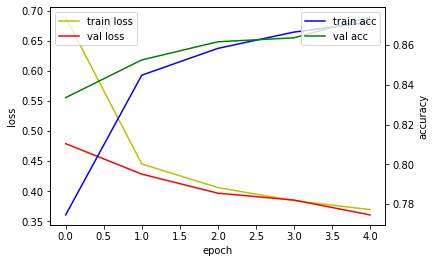

In [157]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

# 카드 서비스 카테고리 맞추는 게 더 중요 : 일단 이것만 보자
loss_ax.plot(hist.history['cat_out_loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_cat_out_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['cat_out_sparse_categorical_accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_cat_out_sparse_categorical_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

## Online test

In [158]:
# cosine similarity
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

In [159]:
card_df = pd.read_csv('./data/20210420_card_meta_features_normalized.csv') #, index=False)
card_df = card_df.set_index('상품번호')

# 모델 입력용 array
df_array = card_df.to_numpy()
ftrs = {x:df_array[idx] for idx, x in enumerate(card_df.index)}

In [160]:
# 서비스이름 참조용
svc_dict = {idx:svc for idx, svc in enumerate(card_df.columns[1:])}

In [161]:
# 카드이름 참조용
name_dict = pickle.load(open('./data/20210420_cardname_dict.pkl', 'rb'))

In [436]:
%%time
n_sel = 3 #np.random.randint(6)
if n_sel > 0:
    sel_ids = card_df.sample(n_sel).index
    sel_ftrs = [ftrs.get(i) for i in sel_ids]
    X1, X2 = np.mean(sel_ftrs, axis=0), np.max(sel_ftrs, axis=0)
else:
    sel_ids = []
    X1, X2 = np.array([0]*24), np.array([0]*24)
sel_names = [name_dict.get(i) for i in sel_ids]
pred = model.predict([pd.DataFrame(X1).T, pd.DataFrame(X2).T])
A = np.concatenate((pred[0][0], pred[1][0]))
print('SELECTED', sel_names)
print('SVC IDS', svc_dict.get(np.argmax(X1)), svc_dict.get(np.argmax(X2)))
ret = []
for B in ftrs:
    if B not in sel_ids:
        ret.append([name_dict.get(B), cos_sim(A, ftrs.get(B))])
print(pd.DataFrame(ret, columns=['name', 'score']).sort_values(by='score', ascending=False).head(5))

SELECTED ['신한카드 Edu', '신한카드 Always FAN', '신한카드 The More(더모아)']
SVC IDS 요식 온라인쇼핑
                      name     score
12  신한카드 Deep On Platinum+  0.672674
46                신한카드 YaY  0.667831
50      신한카드 The More(더모아)  0.652325
10        신한카드 Deep Making  0.570102
15        신한카드 Deep Taking  0.561958
CPU times: user 8.51 ms, sys: 1.95 ms, total: 10.5 ms
Wall time: 8.32 ms
